<a href="https://colab.research.google.com/github/gaws15/AINotebooksVault/blob/main/image02_adl%C4%B1_not_defterinin_kopyas%C4%B1_datai%C3%A7in.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import skeletonize

# Read the image
img = cv2.imread('/content/rotated_frame_13_cropped2.jpg', 0)  # 0 for grayscale
# Get the dimensions of the image
height, width = img.shape[:2]

# Calculate the new dimensions (half size)
new_height = height // 2
new_width = width // 2
# Resize the image
img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)
print(img.shape)
img=img[5:175,342:557]
kernel_size=(3, 3)

(200, 900)


1--preprocessing

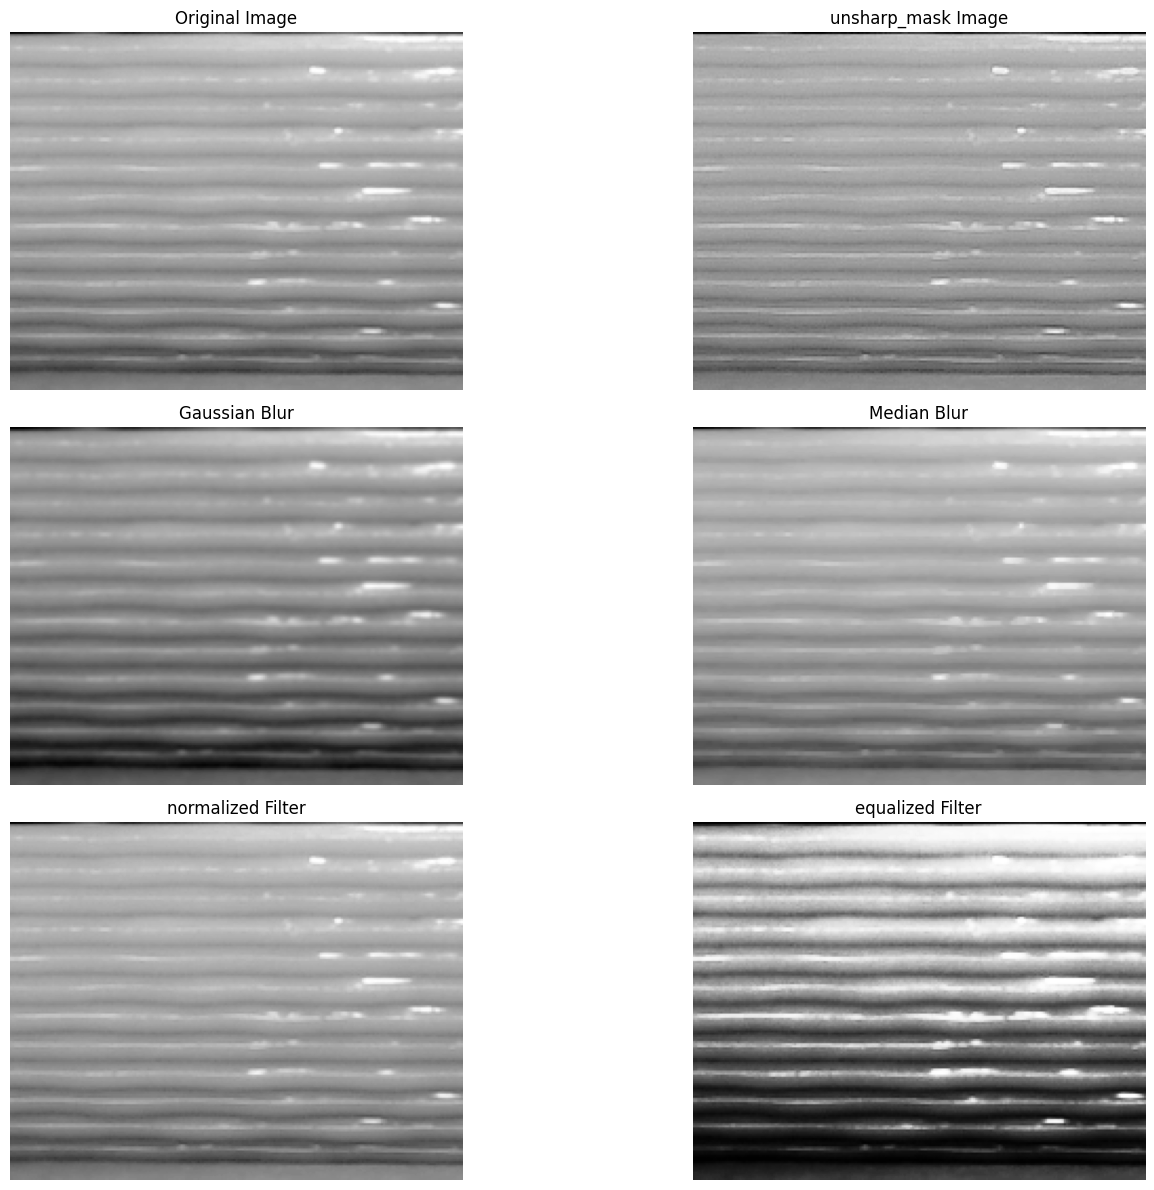

In [100]:

# preprocessing--filterings
gaussian_blur = cv2.GaussianBlur(img, kernel_size, 0)
cv2.imwrite(r"D:\PHDX\00_paper_00_imageProcessing\for_paper\02_gaussian_blured_image.jpg", gaussian_blur)

    # Apply Median Blur
median_blur = cv2.medianBlur(img, kernel_size[0])  # Kernel size is a single value for medianBlur
cv2.imwrite(r"D:\PHDX\00_paper_00_imageProcessing\for_paper\02_median_blured_image.jpg", median_blur)

    # Apply Bilateral Filter
normalized = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
cv2.imwrite(r"D:\PHDX\00_paper_00_imageProcessing\for_paper\02_normalized_image.jpg", normalized)

# Apply Histogram equalizer
equalized = cv2.equalizeHist(img)
cv2.imwrite(r"D:\PHDX\00_paper_00_imageProcessing\for_paper\02_equilized_image.jpg", equalized)

# 1. Unsharp Masking
# Create a blurred version of the image
blurred = cv2.GaussianBlur(img, (3, 3), 0)
unsharp_mask = cv2.addWeighted(img, 1.5, blurred, -1, 1)
cv2.imwrite(r"D:\PHDX\00_paper_00_imageProcessing\for_paper\unsharp_masked.jpg", unsharp_mask)

    # Plot the results
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(unsharp_mask, cmap='gray')
plt.title('unsharp_mask Image')
plt.axis('off')


plt.subplot(3, 2, 3)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(median_blur, cmap='gray')
plt.title('Median Blur')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(normalized, cmap='gray')
plt.title('normalized Filter')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(equalized, cmap='gray')
plt.title('equalized Filter')
plt.axis('off')



plt.tight_layout()
plt.show()

############## 4 farklı filtreleme operasyonu yapılıp içinden median blur ile devam edilmiştir.

2-histogram plot

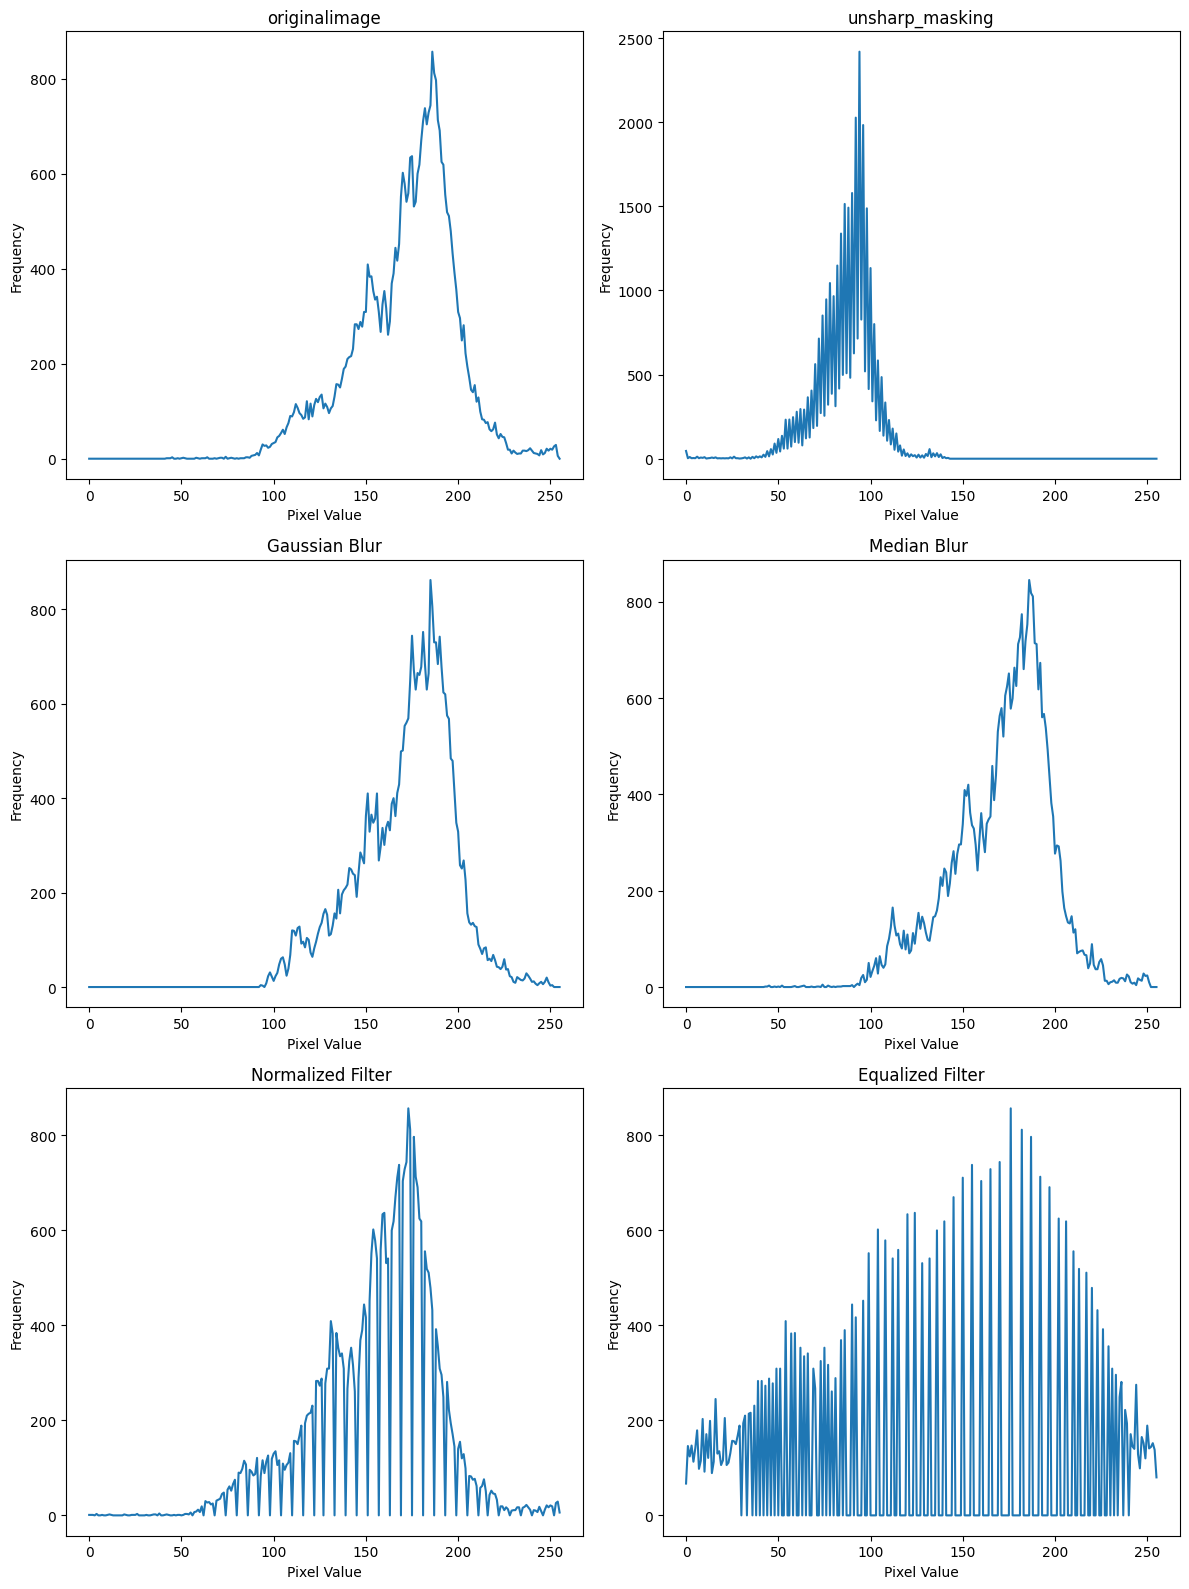

In [107]:
# Create a figure with subplots for each histogram
fig, axs = plt.subplots(3, 2, figsize=(12, 16))
axs = axs.ravel()  # Flatten the array of axes for easier indexing

# Labels for each filter (adjust according to your filters)
filters = ['originalimage','unsharp_masking','Gaussian Blur', 'Median Blur ', 'Normalized Filter ', 'Equalized Filter']

for i, (filtered_image, ax) in enumerate(zip([img,unsharp_mask,gaussian_blur,median_blur,normalized,equalized], axs)):
    # Compute histogram for each filtered image
    # We assume images are in uint8 format for 0-255 range; adjust if using float
    hist, bins = np.histogram(filtered_image.ravel(), bins=256, range=(0, 256))  # For uint8 images

    # Plot histogram
    ax.plot(bins[:-1], hist)
    ax.set_title(filters[i])
    ax.set_xlabel('Pixel Value')
    ax.set_ylabel('Frequency')
    # Save the entire figure after plotting all subplots
    fig.savefig(f'subplots.png', bbox_inches='tight') # Changed line to save the entire figure

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



3--Morphological Operations

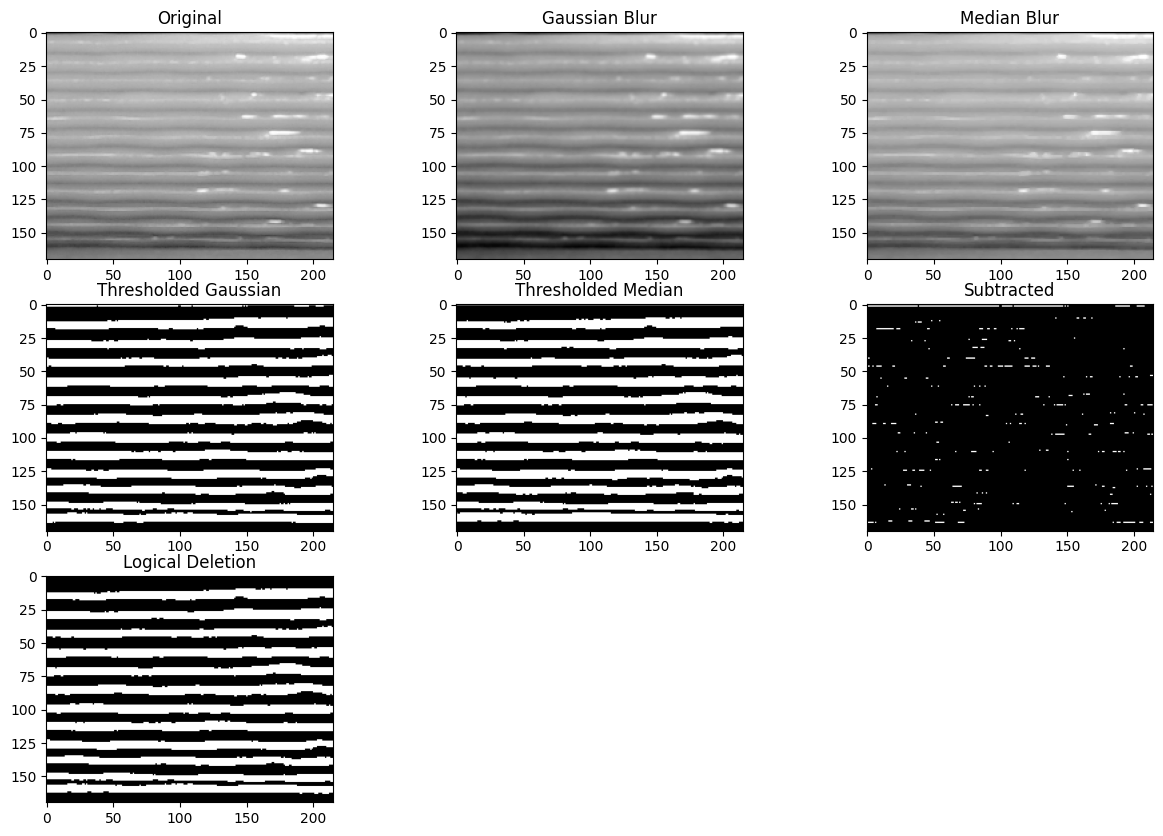

In [122]:
from skimage.morphology import skeletonize # This line likely already exists in the beginning of your notebook

# Apply adaptive thresholding on the blurred image
thresh1 = cv2.adaptiveThreshold(median_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 2)


# Adaptive Thresholding
thresh_gauss = cv2.adaptiveThreshold(gaussian_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 2)
thresh_median = cv2.adaptiveThreshold(median_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 2)
cv2.imwrite(r"D:\PHDX\00_paper_00_imageProcessing\for_paper\thresh_gauss.jpg", thresh_gauss)
cv2.imwrite(r"D:\PHDX\00_paper_00_imageProcessing\for_paper\thresh_median.jpg", thresh_median)

# Subtract the thresholded images
subtracted_img = cv2.subtract(thresh_gauss, thresh_median)

# Logical deletion (keep only pixels where both images are white)
logical_deleted_img = cv2.bitwise_and(thresh_gauss, thresh_median)


cv2.imwrite(r"D:\PHDX\00_paper_00_imageProcessing\for_paper\logical_deleted_img.jpg", logical_deleted_img)

# Plot the results
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(3, 3, 2), plt.imshow(gaussian_blur, cmap='gray'), plt.title('Gaussian Blur')
plt.subplot(3, 3, 3), plt.imshow(median_blur, cmap='gray'), plt.title('Median Blur')
plt.subplot(3, 3, 4), plt.imshow(thresh_gauss, cmap='gray'), plt.title('Thresholded Gaussian')
plt.subplot(3, 3, 5), plt.imshow(thresh_median, cmap='gray'), plt.title('Thresholded Median')
plt.subplot(3, 3, 6), plt.imshow(subtracted_img, cmap='gray'), plt.title('Subtracted')
plt.subplot(3, 3, 7), plt.imshow(logical_deleted_img, cmap='gray'), plt.title('Logical Deletion')

plt.show()




median masking

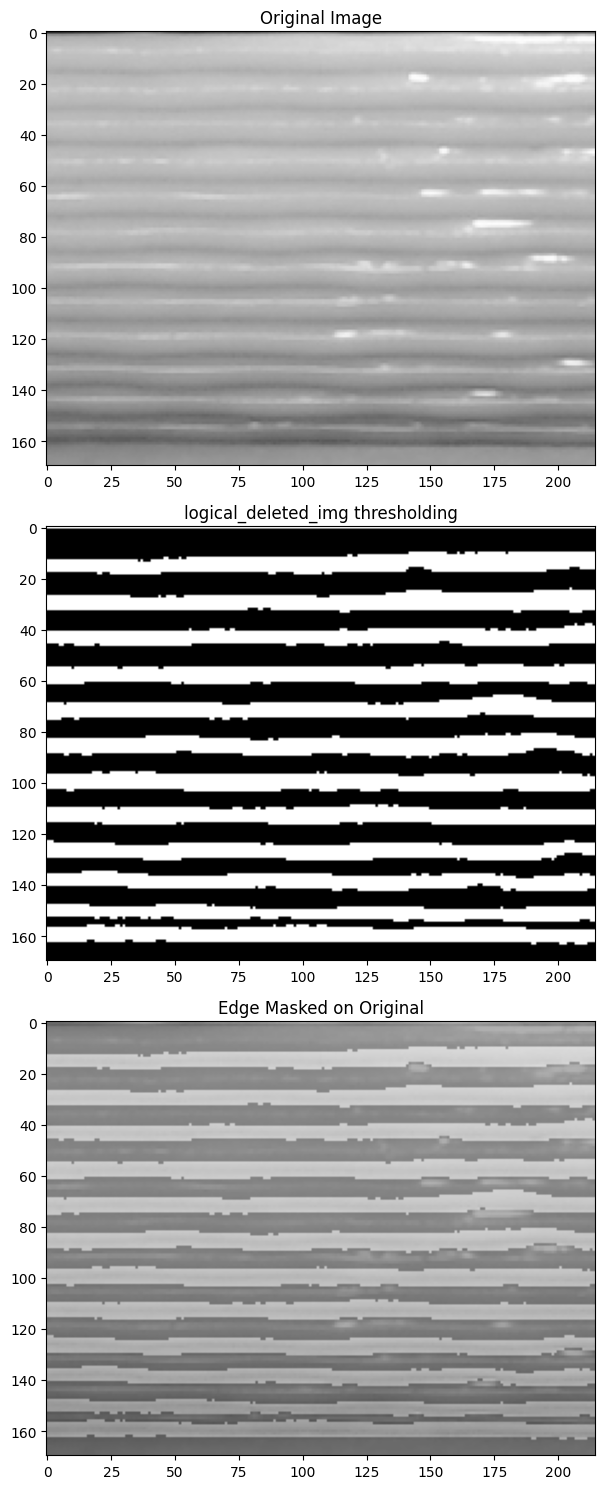

In [123]:
# Create a mask with the same shape and type as img (grayscale)
mask = np.zeros_like(img)
# Mark edges in white on the grayscale mask
mask[logical_deleted_img != 0] = 255  # Use 255 for white in grayscale

# Overlay the mask on the original image using addWeighted
masked_image = cv2.addWeighted(img, 0.7, mask, 0.3, 0)

# Visualization
plt.figure(figsize=(60, 15))

plt.subplot(3, 1, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(3, 1, 2)
plt.title('logical_deleted_img thresholding')
plt.imshow(logical_deleted_img, cmap='gray')   #####xx

plt.subplot(3, 1, 3)
plt.title('Edge Masked on Original')
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


diğer thinning--skeletonizing methods

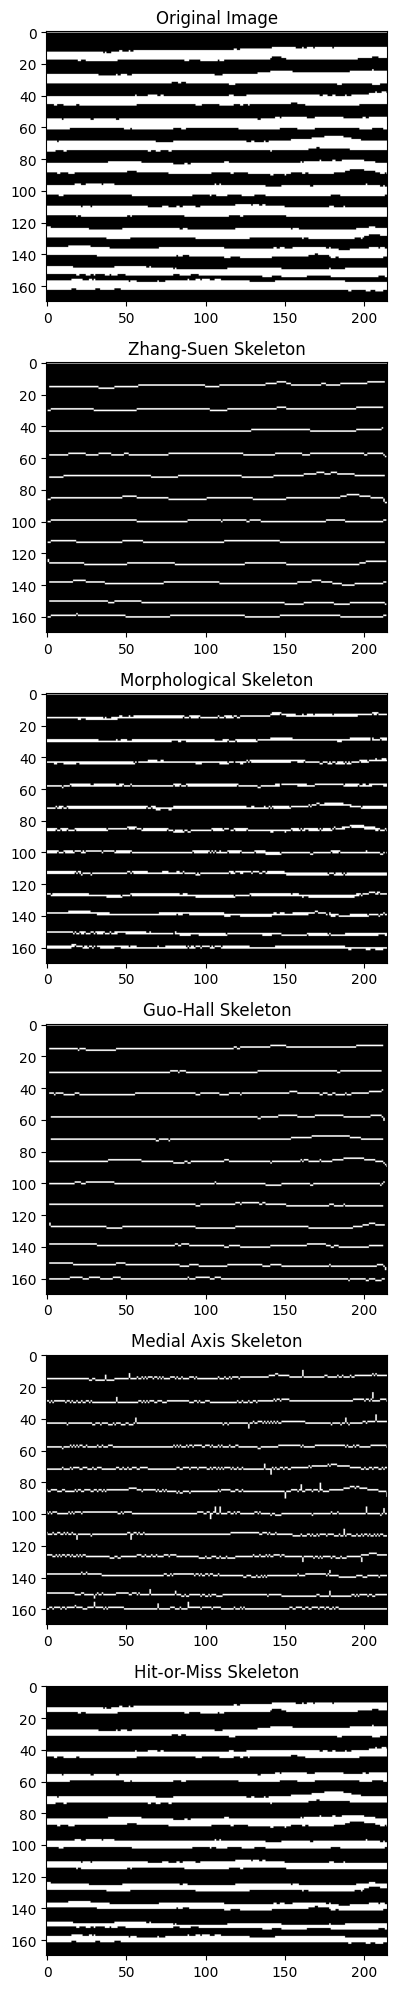

In [124]:
import cv2
import numpy as np
from skimage.morphology import skeletonize, thin, medial_axis
import matplotlib.pyplot as plt

# Convert to 0 or 1 for skimage
binary = logical_deleted_img // 255

# 1. Zhang-Suen Skeletonization
zhang_suen = skeletonize(binary)
zhang_suen = (zhang_suen * 255).astype(np.uint8)
cv2.imwrite(r"D:\PHDX\00_paper_00_imageProcessing\for_paper\zhang_suen.jpg", zhang_suen)

# 2. Morphological Skeleton (OpenCV)
def morphological_skeleton(img):
    size = np.size(img)
    skeleton = np.zeros(img.shape, np.uint8)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    while True:
        eroded = cv2.erode(img, kernel)
        temp = cv2.dilate(eroded, kernel)
        temp = cv2.subtract(img, temp)
        skeleton = cv2.bitwise_or(skeleton, temp)
        img = eroded.copy()
        if cv2.countNonZero(img) == 0:
            break
    return skeleton

morph_skel = morphological_skeleton(binary * 255)
cv2.imwrite(r"D:\PHDX\00_paper_00_imageProcessing\for_paper\morph_skel.jpg", morph_skel)

# 3. Guo-Hall Thinning
thin_guo_hall = thin(logical_deleted_img)  # Remove max_iter argument
thin_guo_hall = (thin_guo_hall * 255).astype(np.uint8)
cv2.imwrite(r"D:\PHDX\00_paper_00_imageProcessing\for_paper\thin_guo_hall.jpg", thin_guo_hall)

# 4. Medial Axis Skeletonization
medial_skel, distance = medial_axis(binary, return_distance=True)
medial_skel = (medial_skel * 255).astype(np.uint8)
cv2.imwrite(r"D:\PHDX\00_paper_00_imageProcessing\for_paper\medial_skel.jpg", medial_skel)

# 5. Hit-or-Miss Skeletonization
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
hit_miss_skel = cv2.morphologyEx(binary * 255, cv2.MORPH_HITMISS, kernel)
cv2.imwrite(r"D:\PHDX\00_paper_00_imageProcessing\for_paper\hit_miss_skel.jpg", hit_miss_skel)

# Visualization
plt.figure(figsize=(100, 20))

plt.subplot(6, 1, 1)
plt.title('Original Image')
plt.imshow(binary * 255, cmap='gray')

plt.subplot(6, 1, 2)
plt.title('Zhang-Suen Skeleton')
plt.imshow(zhang_suen, cmap='gray')

plt.subplot(6, 1, 3)
plt.title('Morphological Skeleton')
plt.imshow(morph_skel, cmap='gray')

plt.subplot(6, 1, 4)
plt.title('Guo-Hall Skeleton')
plt.imshow(thin_guo_hall, cmap='gray')

plt.subplot(6, 1, 5)
plt.title('Medial Axis Skeleton')
plt.imshow(medial_skel, cmap='gray')

plt.subplot(6, 1, 6)
plt.title('Hit-or-Miss Skeleton')
plt.imshow(hit_miss_skel, cmap='gray')

plt.tight_layout()
plt.show()


In [85]:
# sampling and calculation -zhang-Suen Skeletonisation

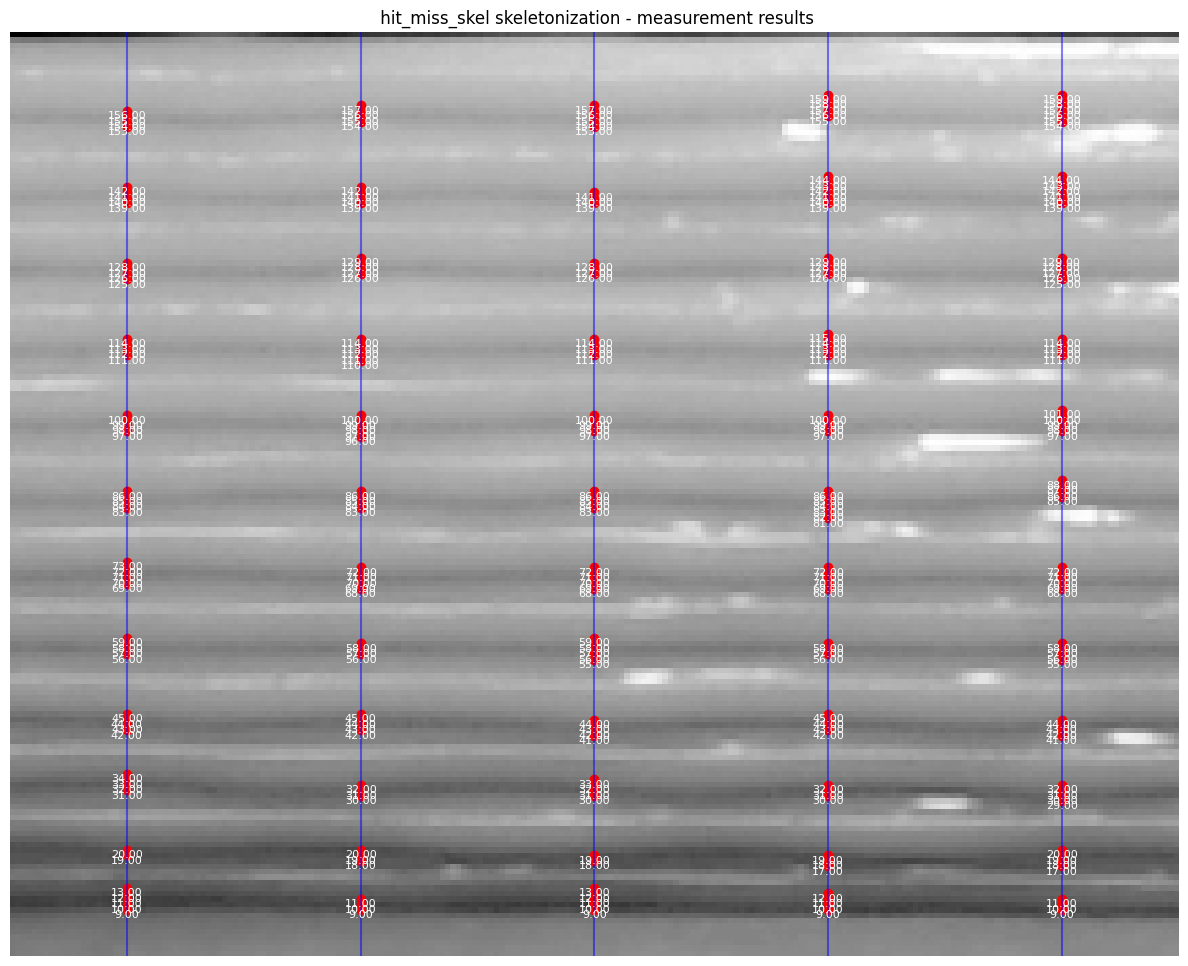

In [132]:
# 1. Zhang-Suen Skeletonization
# Divide vertically into 50 segments
# Image dimensions
height, width = hit_miss_skel.shape

divisions = 5
all_points = []

for i in range(divisions):
    x = int((i + 0.5) * width / divisions)  # +0.5 to center the line in each division
    local_points = []

    for y in range(height):
        if hit_miss_skel[y, x] > 0:  # Assuming edges are represented by positive values
            local_points.append((x, y))

    # If no edges found, add one point at the bottom
    if not local_points:
        local_points.append((x, height - 1))

    all_points.extend(local_points)

# Visualization
plt.figure(figsize=(36, 12))
plt.imshow(img, cmap='gray')

# Plot all points
for x, y in all_points:
    plt.plot(x, y, 'ro')  # red dot for each intersection point

# Draw vertical lines for each division
for i in range(divisions):
    x = int((i + 0.5) * width / divisions)
    plt.axvline(x, color='b', alpha=0.5)  # Blue vertical lines

# Measure and annotate distance from each point to the bottom
for x, y in all_points:
    distance = height - y  # Measure from the point to the bottom
    plt.text(x, y, f'{distance:.2f}', color='white', fontsize=8, ha='center', va='top')  # va='top' to position text above point

plt.title(' hit_miss_skel skeletonization - measurement results')
plt.axis('off')
plt.savefig('hit_miss_skel.png', bbox_inches='tight')
plt.show()



masking operation ans see the line on the original image   ---verification

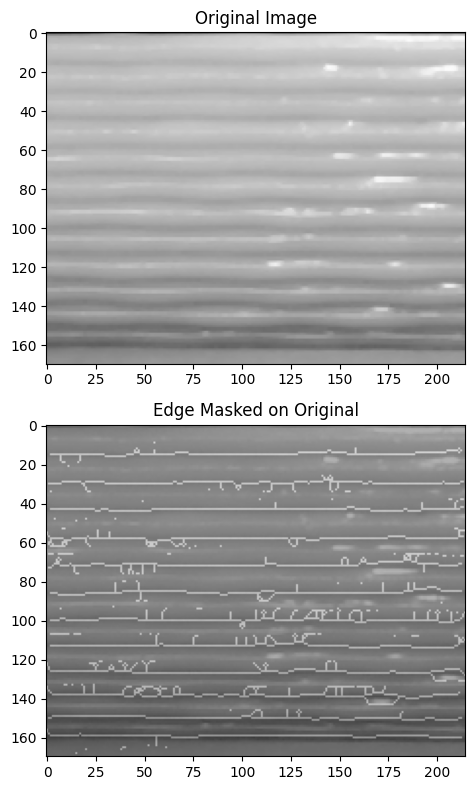

In [87]:
# Create mask from skeleton with 3 channels
mask = np.zeros_like(img, dtype=np.uint8)  # Ensure dtype is uint8 for color image

# Convert the mask to BGR format
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)  # Convert to 3 channels

# Now you can assign the color to the mask (still grayscale):
mask[zhang_suen == 255] = 255  # Mark edges in white (or any grayscale value)

# Overlay the mask on the original image
# Since both are grayscale now, addWeighted should work
masked_image = cv2.addWeighted(img, 0.7, mask[:,:,0], 0.3, 0) #Use only one channel from mask

# Now you can assign the color to the mask:
mask[zhang_suen == 255] = [0, 255, 0]  # Mark edges in green


# Visualization
plt.figure(figsize=(20, 8))

plt.subplot(2, 1, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))

plt.subplot(2, 1, 2)
plt.title('Edge Masked on Original')
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

Masking Operation

In [144]:
from google.colab import drive
import glob
import shutil
import os

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Define source and destination paths
source_path = '/content/'  # Or specify the specific folder where images are saved
destination_path = '/content/drive/My Drive/Colab_Images'  # Choose your destination folder in Drive

# 3. Create destination folder if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# 4. Find all image files in the source path
image_files = glob.glob(os.path.join(source_path, '*.jpg'))  # Adjust file extensions if needed (e.g., *.png, *.jpeg)

# 5. Copy image files to the destination folder
for image_file in image_files:
    shutil.copy(image_file, destination_path)

print(f"All image files copied to {destination_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
All image files copied to /content/drive/My Drive/Colab_Images
